In [1]:
import torch
import torchvision
from VAE import VAEEncoder
from torch.utils.data import DataLoader, TensorDataset
from sklearn.model_selection import KFold, train_test_split
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


C:\ProgramData\Miniconda3\envs\DataAugmentationVAE\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [20]:

def train(autoencoder, data, epochs=20):
    opt = torch.optim.Adam(autoencoder.parameters())
    for epoch in range(epochs):
        for x in data:
            #x = x.to(device) # GPU
            opt.zero_grad()
            x_hat = autoencoder(x)
            loss = ((x - x_hat)**2).sum()
            loss.backward()
            opt.step()
    return autoencoder

In [21]:

latent_dims = 2
autoencoder = AE(latent_dims)

In [22]:
oven_df = pd.read_csv("dataset.csv")
oven_df = oven_df[["drying_time", "end_temp", "mean_oven_input_temperature", "mean_blower_differential_pressure","oven_inlet_end_temperature","initial_mass","end_mc","oven_chamber_position"]]
ocps = pd.get_dummies(oven_df["oven_chamber_position"]).rename(columns={1:"OCN1",2:"OCN2",3:"OCN3",4:"OCN4"})
oven_df = pd.concat([oven_df, ocps],axis=1)
oven_df = oven_df.drop(columns=["oven_chamber_position"])


In [23]:
x_train = torch.from_numpy(oven_df.values).float()
train_dataset = TensorDataset(x_train)
data = DataLoader(train_dataset, batch_size=16,shuffle=True,drop_last=True)

In [24]:
autoencoder = train(autoencoder, data)

TypeError: flatten(): argument 'input' (position 1) must be Tensor, not list

<Figure size 640x480 with 0 Axes>

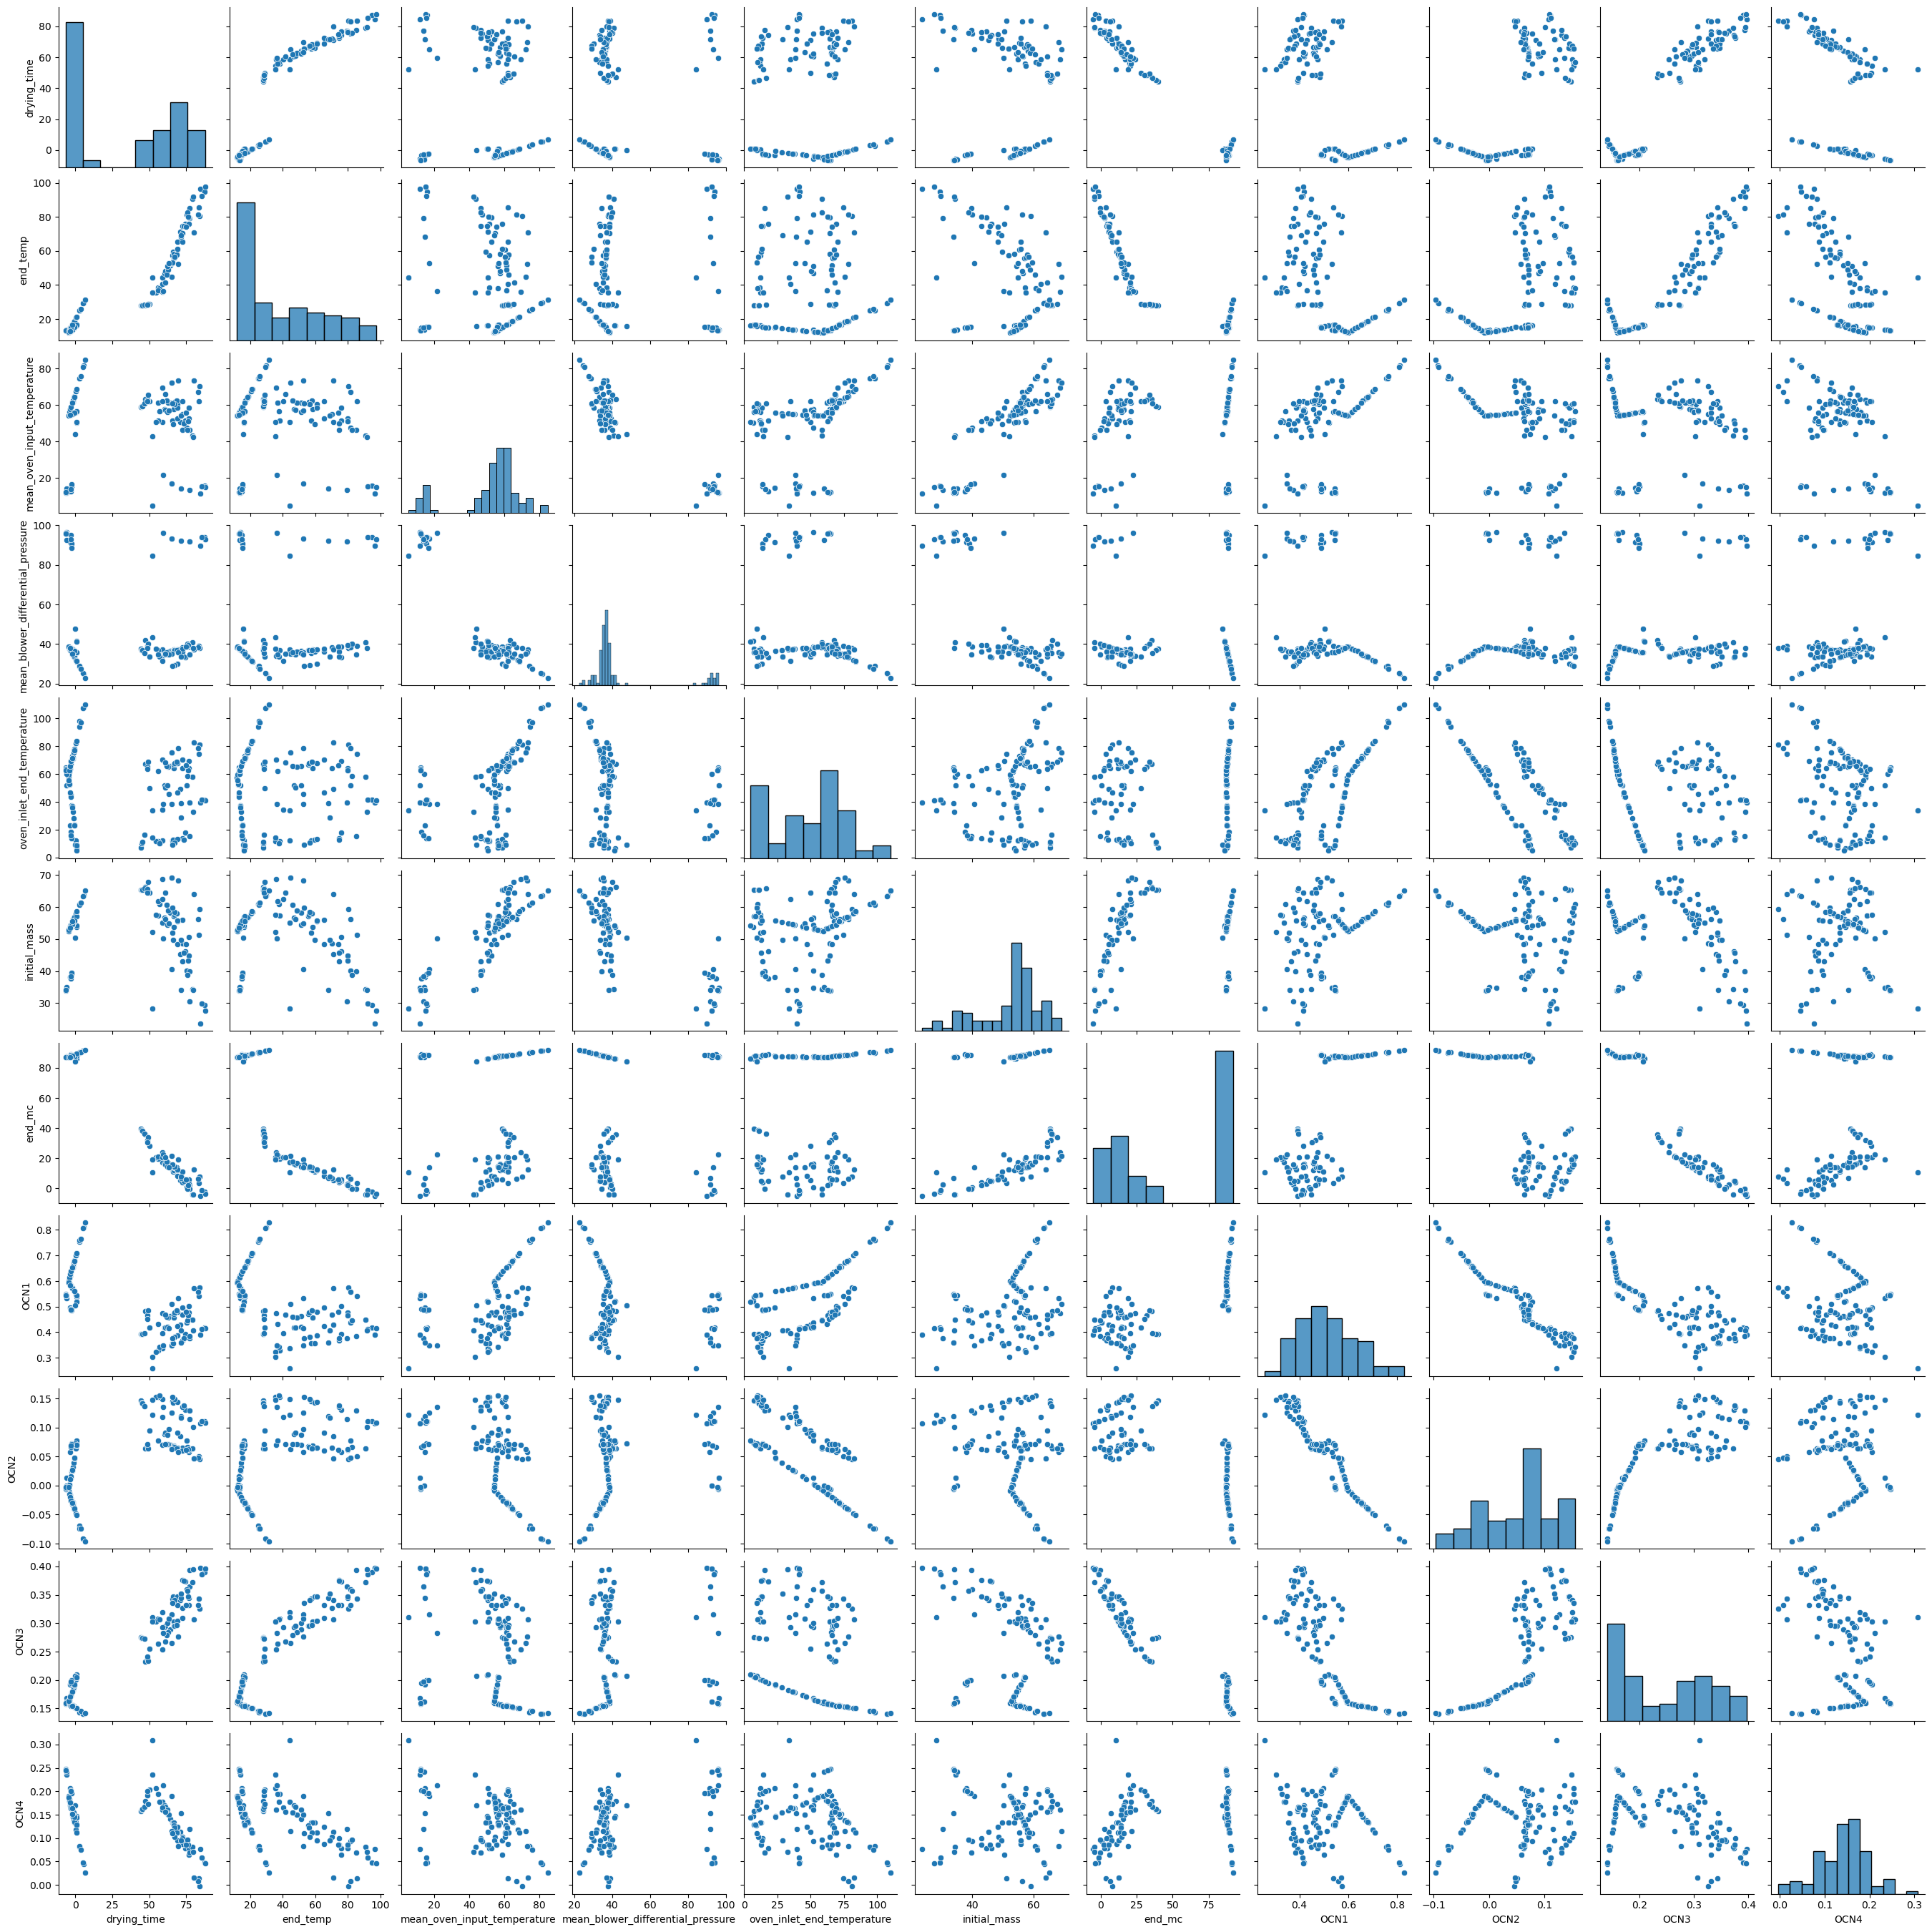

In [2]:
vae = torch.load("5d-exp1.pt")

sample = vae.draw_sample()
sample = sample.float()

generated_data = vae.decoder(sample)

data = generated_data.detach().numpy()
col_names = ["drying_time", "end_temp", "mean_oven_input_temperature", "mean_blower_differential_pressure","oven_inlet_end_temperature","initial_mass","end_mc","OCN1","OCN2","OCN3","OCN4"]
data_df = pd.DataFrame(data,columns=col_names)

plt.figure()
sns.pairplot(data_df)
plt.show()

<Figure size 640x480 with 0 Axes>

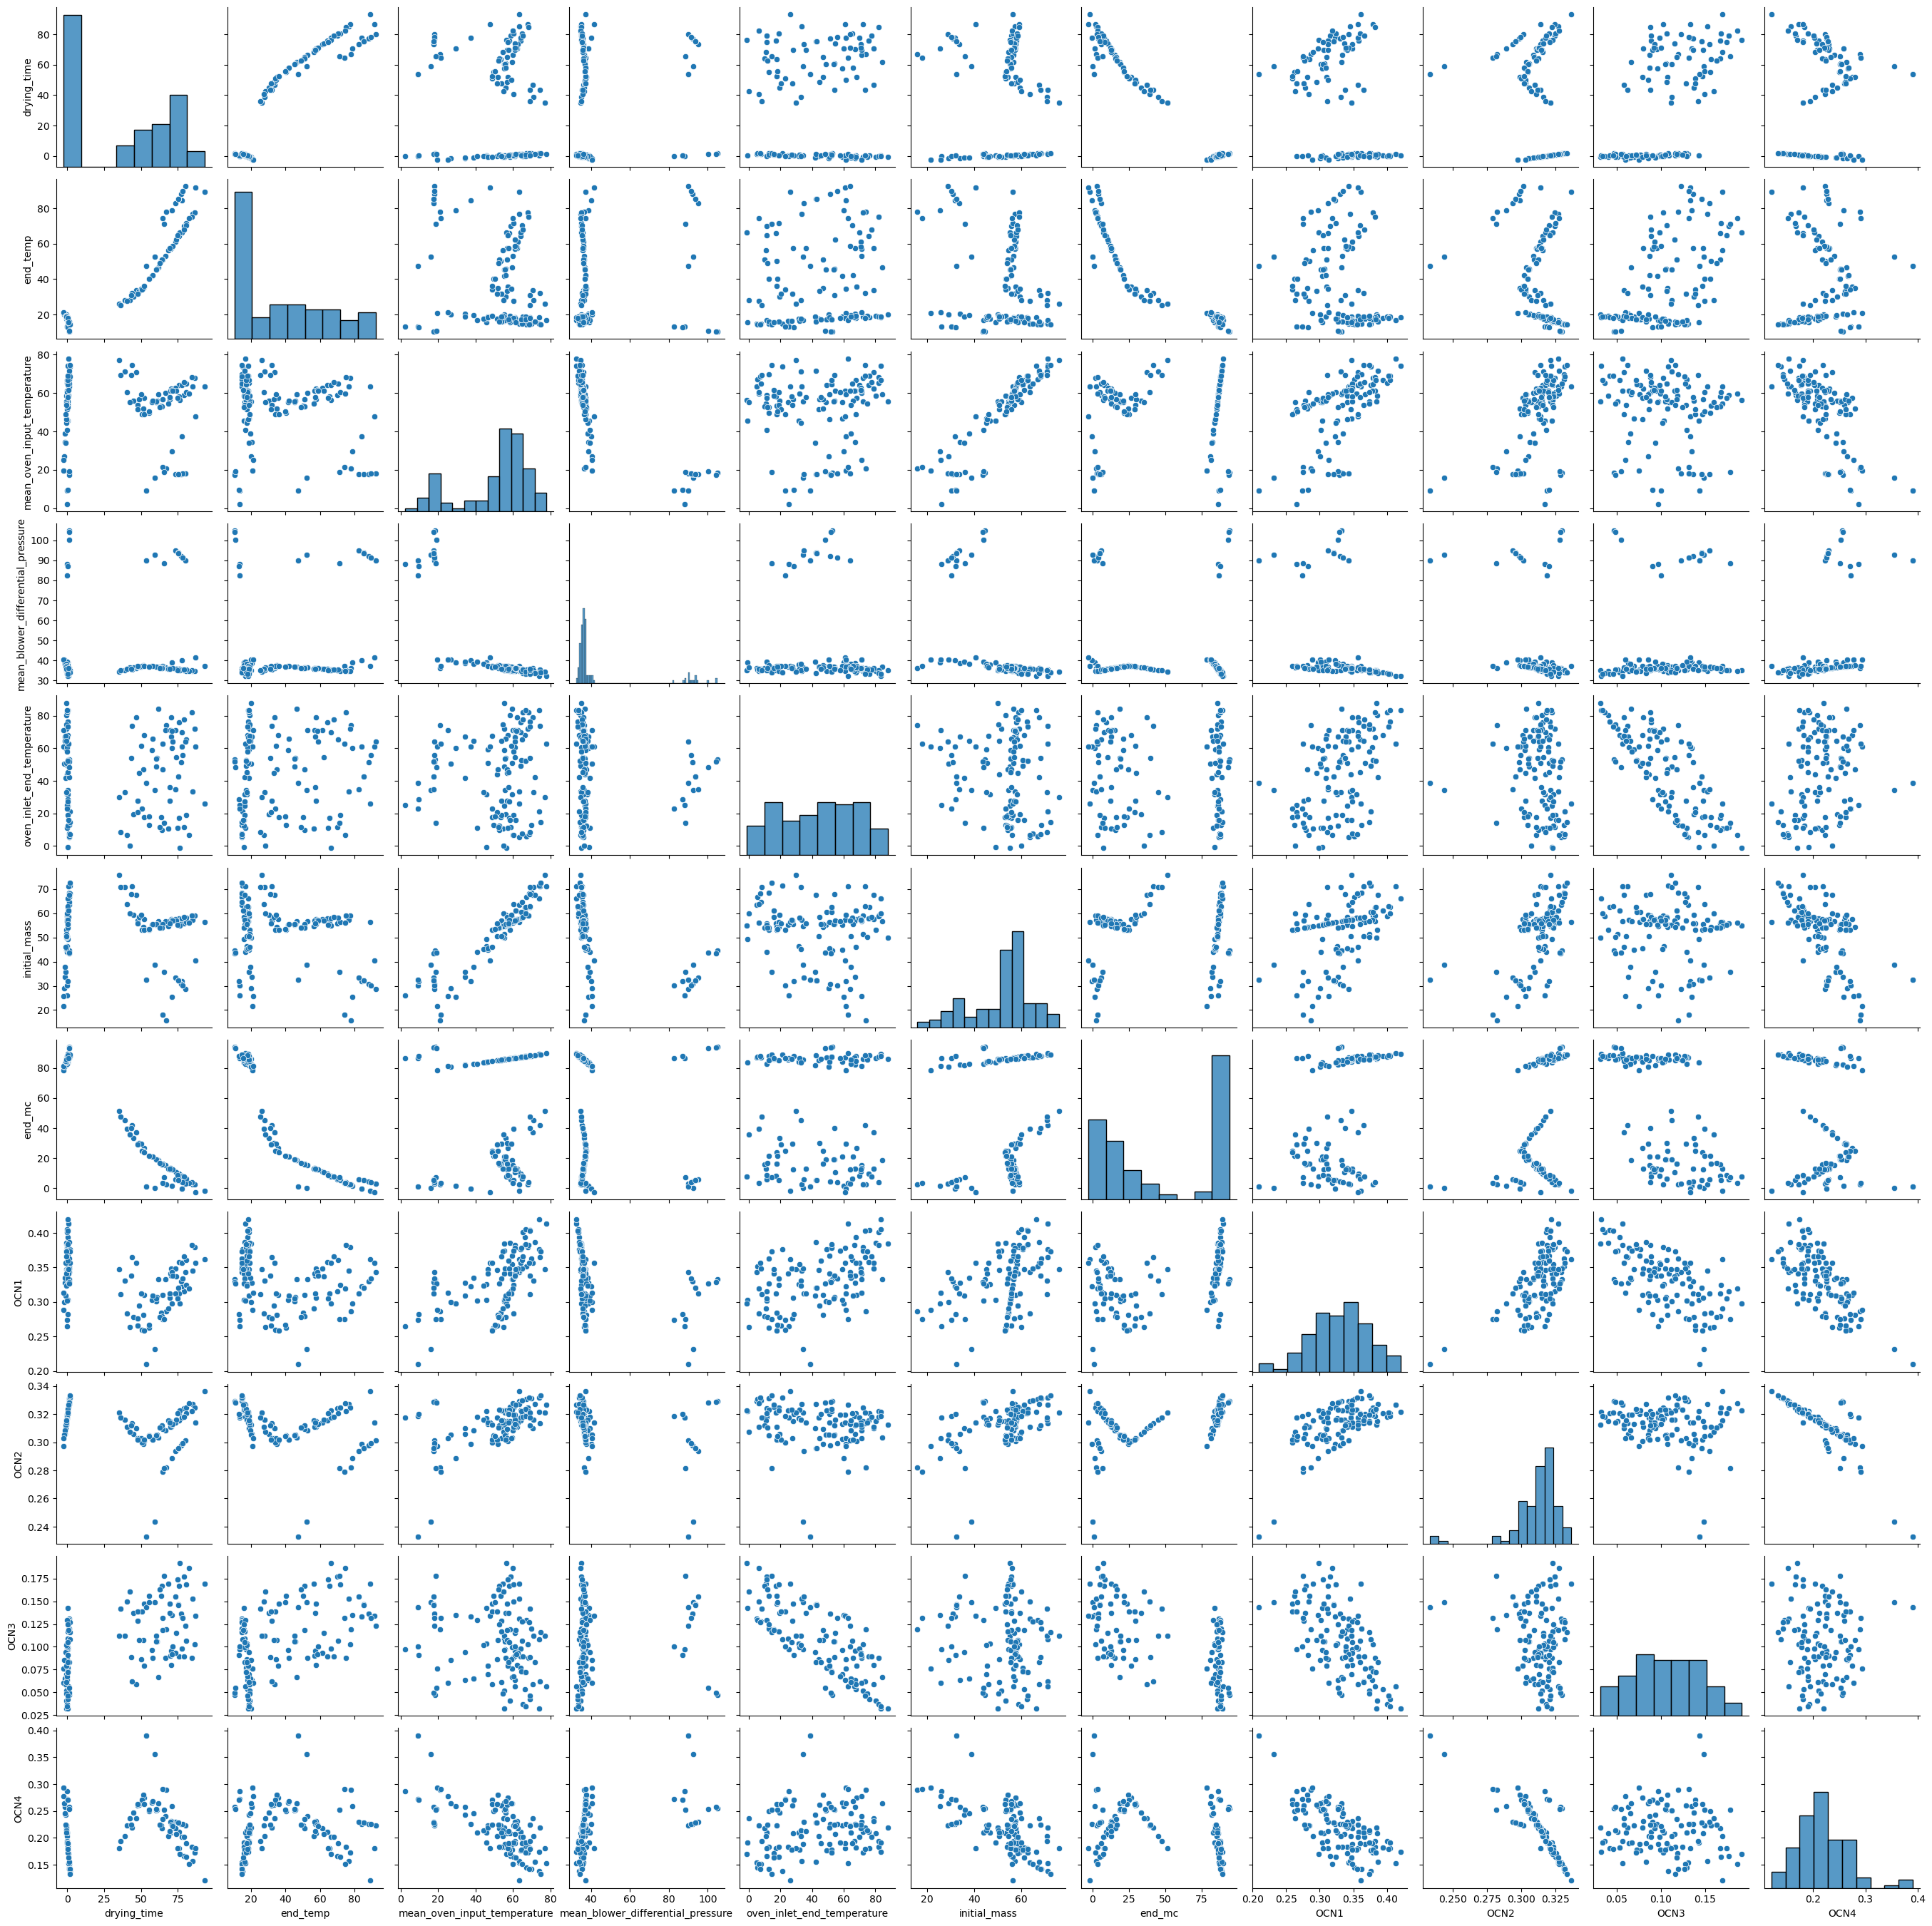

In [3]:
vae = torch.load("3d-exp6.pt")

sample = vae.draw_sample()
sample = sample.float()

generated_data = vae.decoder(sample)

data = generated_data.detach().numpy()
col_names = ["drying_time", "end_temp", "mean_oven_input_temperature", "mean_blower_differential_pressure","oven_inlet_end_temperature","initial_mass","end_mc","OCN1","OCN2","OCN3","OCN4"]
data_df = pd.DataFrame(data,columns=col_names)

plt.figure()
sns.pairplot(data_df)
plt.show()

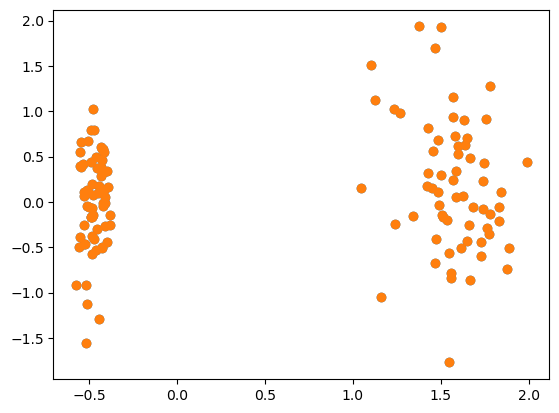

In [29]:
plt.scatter(sample[:,0].detach().numpy(),sample[:,1].detach().numpy())
plt.show()

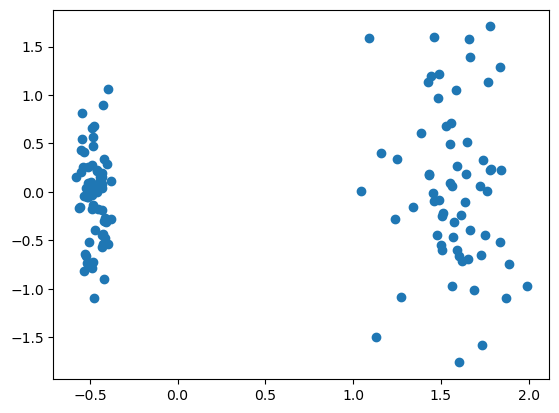

In [30]:
sample = vae.draw_sample()
plt.scatter(sample[:,0].detach().numpy(),sample[:,1].detach().numpy())
plt.show()

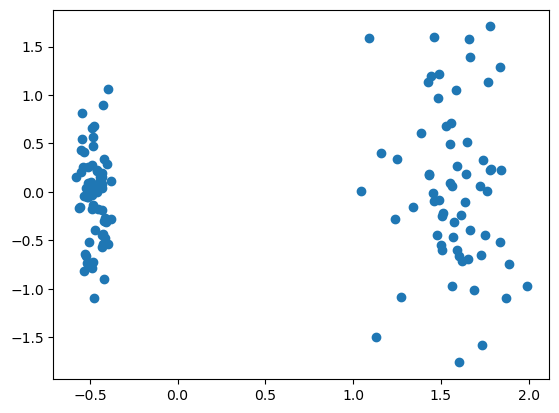

In [31]:
plt.scatter(sample[:,0].detach().numpy(),sample[:,1].detach().numpy())
plt.show()